In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as ply
from sklearn.model_selection import TimeSeriesSplit
from fbprophet import Prophet
%matplotlib inline

In [2]:
df_actual = pd.read_csv("../write_data/Raleigh.csv")
df_actual['time'] = pd.to_datetime(df_actual['time'])

In [3]:
df_fut = pd.read_csv("../write_data/Raleigh_future.csv")
df_fut['ds'] = pd.to_datetime(df_fut['ds'])

In [4]:
zippies = df_fut.Zip_code.unique()

In [5]:
all_zips = pd.read_csv("../write_data/zillow_housing_zipcodes.csv")
all_zips['Date_index'] = pd.to_datetime(all_zips['Date_index'])
all_zips = all_zips.set_index('Date_index')

In [6]:
zippies_strings = ["%.0f" % number for number in zippies]

In [7]:
metro_zips = all_zips.filter(items=zippies_strings)

In [8]:
actual_mean = metro_zips.mean(axis=1)

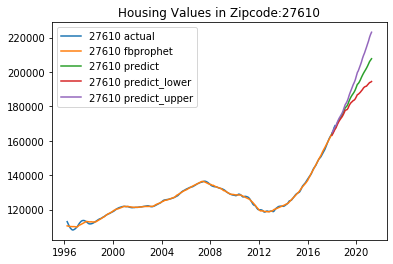

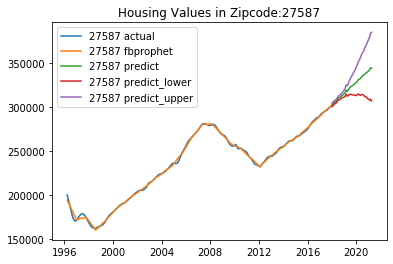

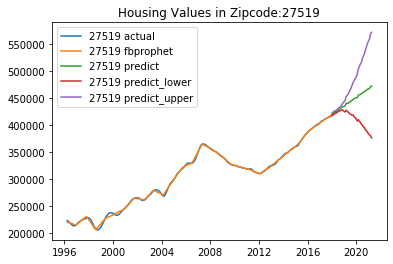

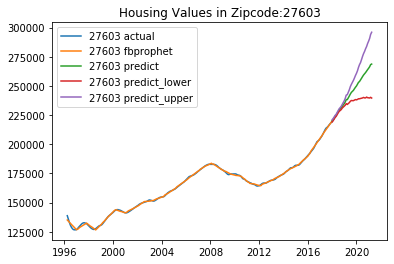

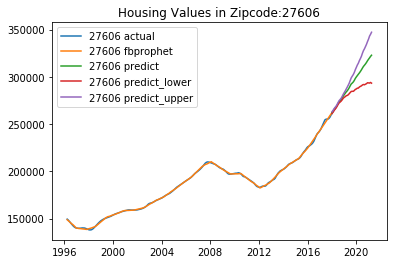

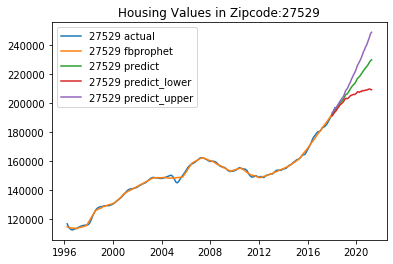

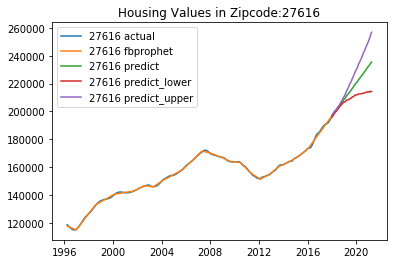

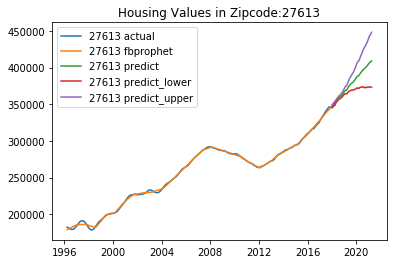

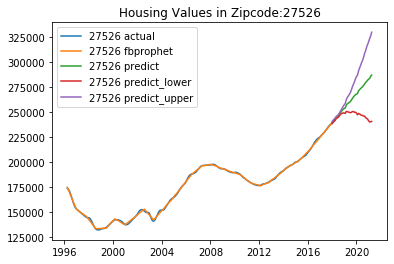

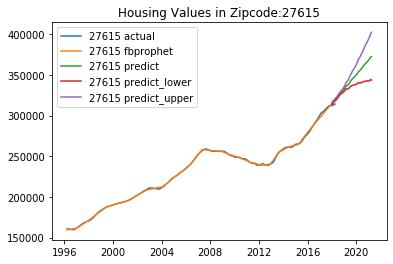

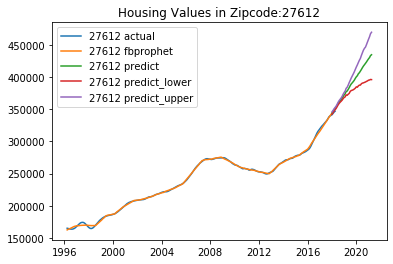

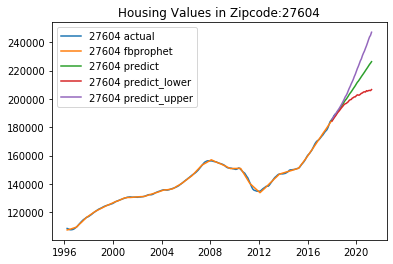

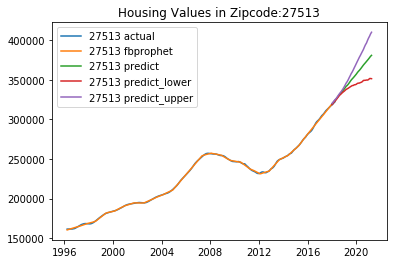

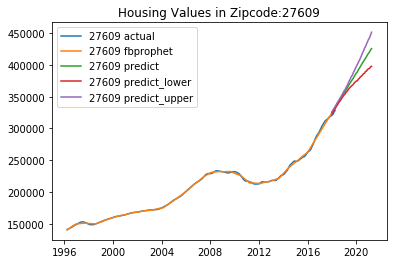

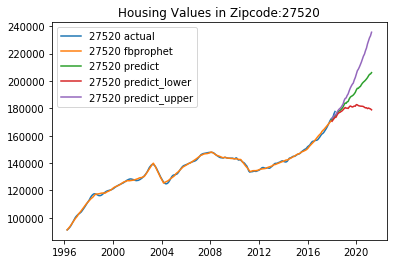

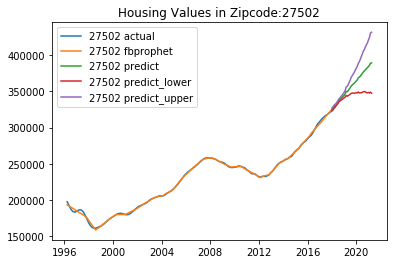

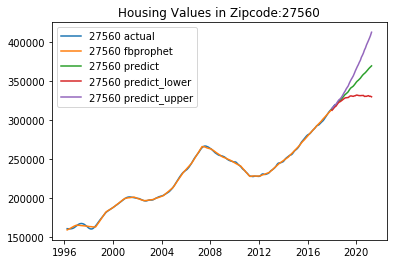

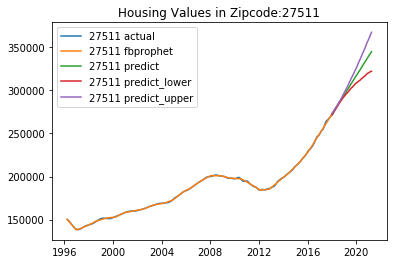

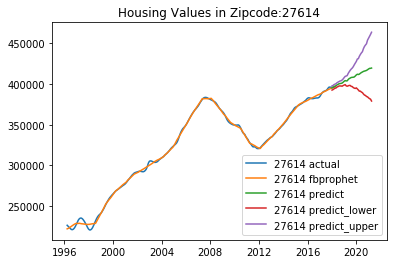

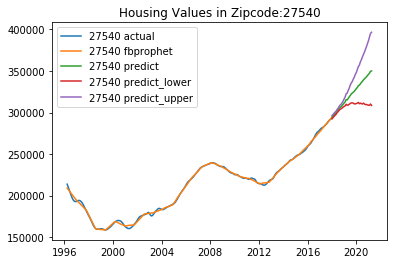

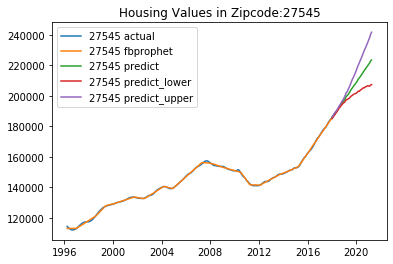

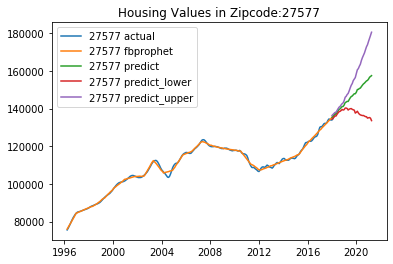

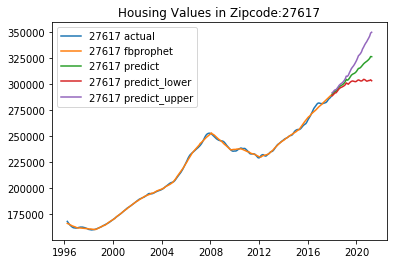

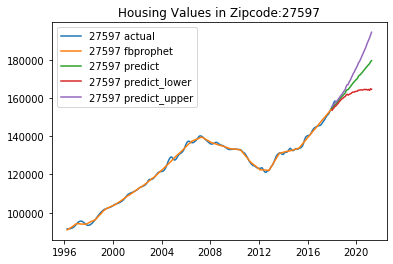

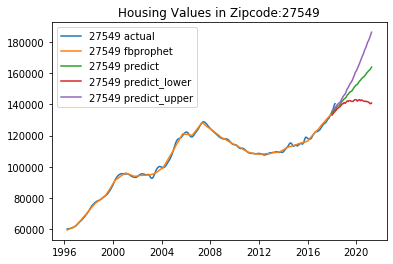

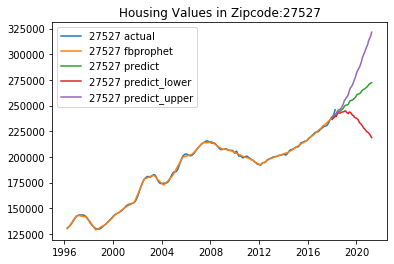

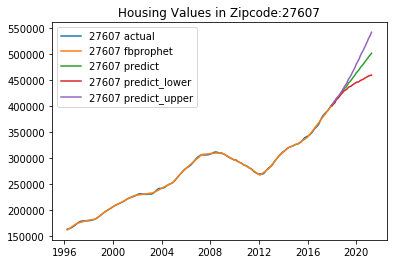

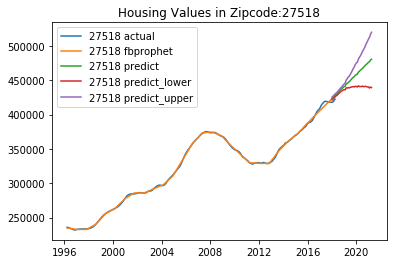

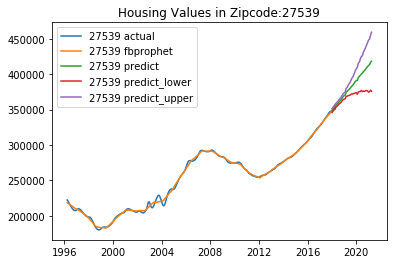

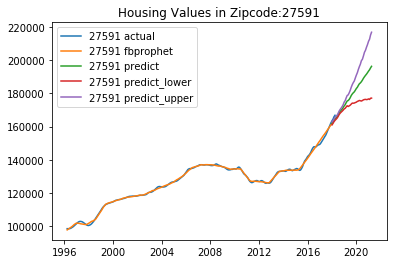

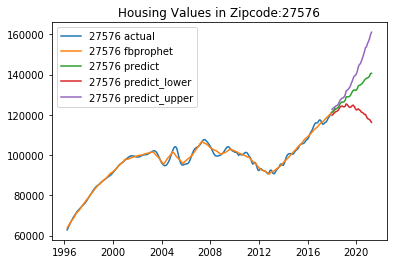

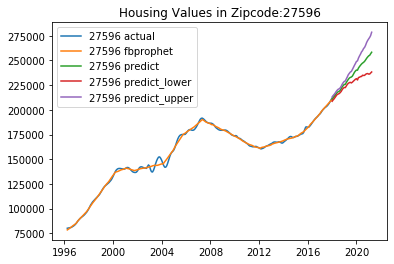

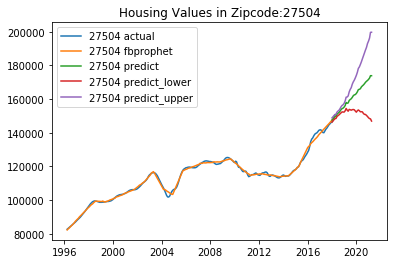

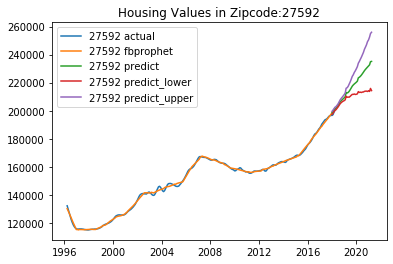

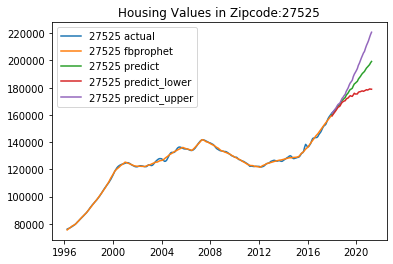

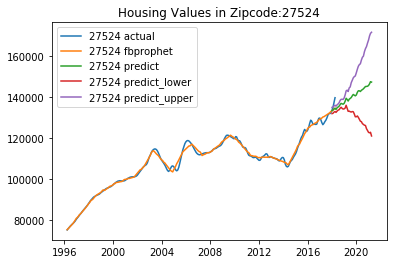

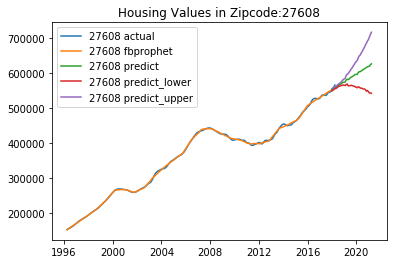

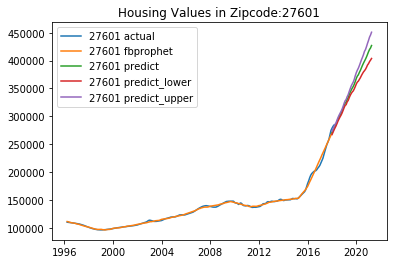

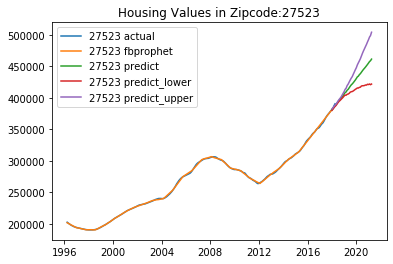

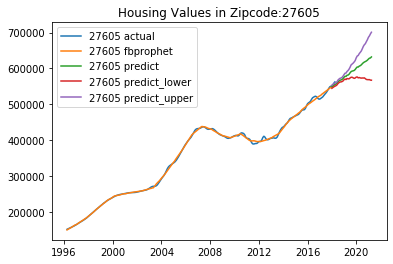

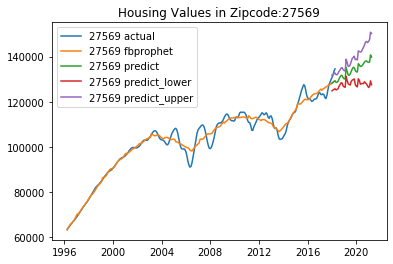

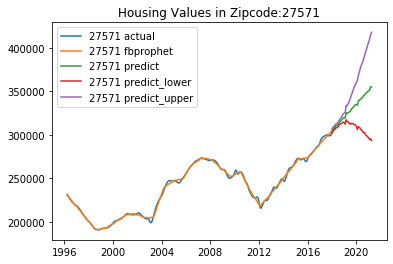

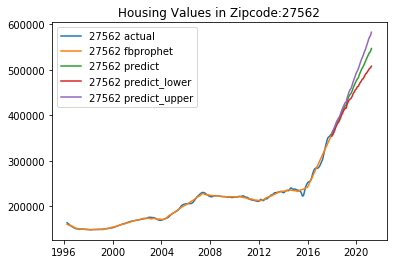

In [9]:
for zippy in zippies:
    
    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['value'], 
             label=f'{zippy} actual')

    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} fbprophet')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} predict')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_lower'], 
             label=f'{zippy} predict_lower')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_upper'], 
             label=f'{zippy} predict_upper')
    
    plt.legend(loc='best')
    plt.title(f"Housing Values in Zipcode:{zippy}")
    
    plt.show()

In [10]:
metro_annual = metro_zips.resample("YS").mean()
metro_annual_pct = metro_annual.pct_change()
metro_annual_pct_diff = metro_annual.pct_change().diff()

In [11]:
metro_annual_pct.min().min(), metro_annual_pct.max().max()

(-0.1271190172163269, 0.23909860922304693)

In [12]:
metro_annual_pct_diff.min().min(), metro_annual_pct_diff.max().max()

(-0.13861838252808267, 0.18077634273344967)

In [13]:
df_pred_wide = df_actual.pivot(index='time', columns='Zip_code',values='yhat')
df_fut_wide = df_fut.pivot(index='ds', columns='Zip_code',values='yhat')

In [14]:
fbproph = pd.concat([df_pred_wide.resample("YS").mean(), df_fut_wide.resample("YS").mean()], axis=0)
fb_pct_change = fbproph.pct_change()
fb_ann = fbproph.pct_change().diff()

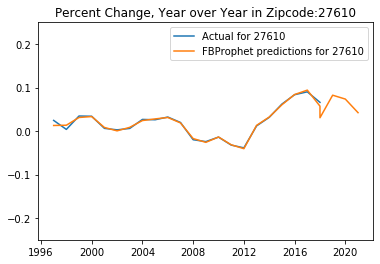

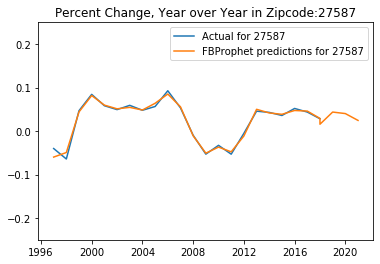

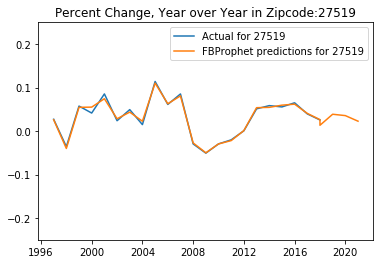

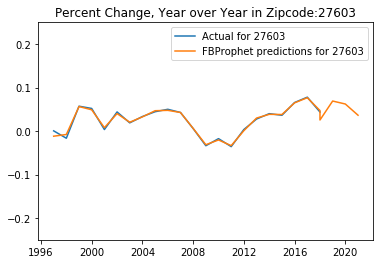

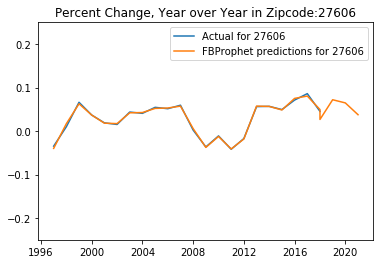

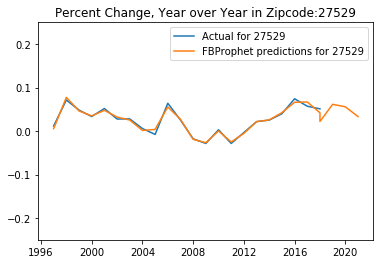

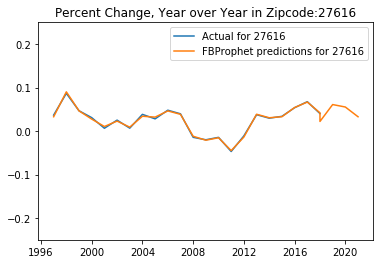

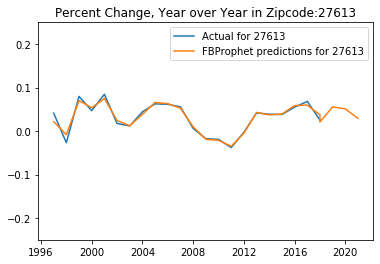

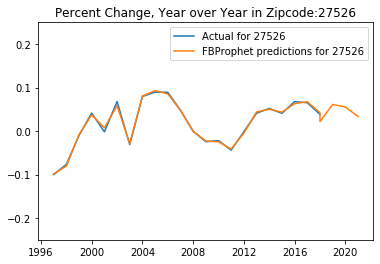

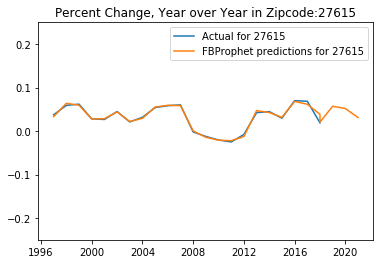

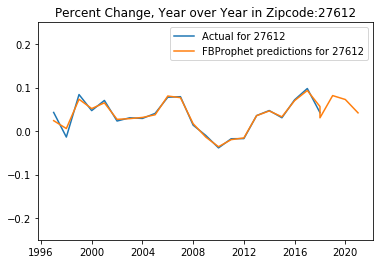

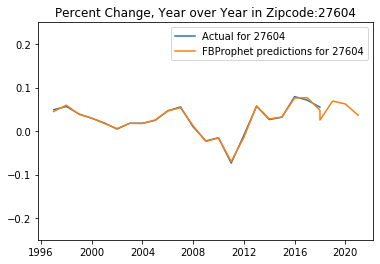

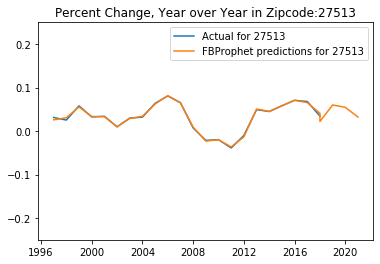

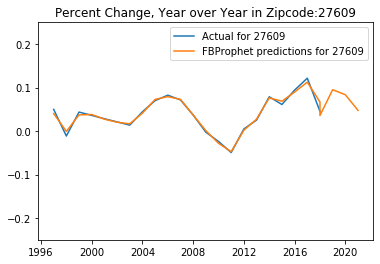

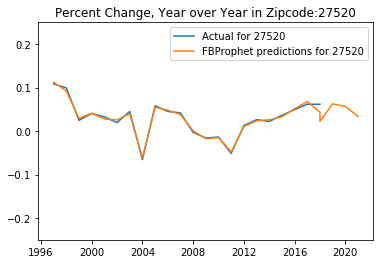

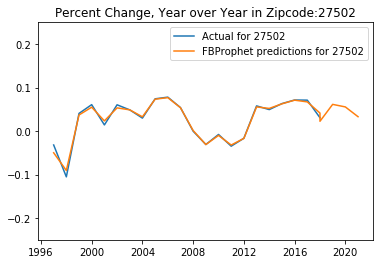

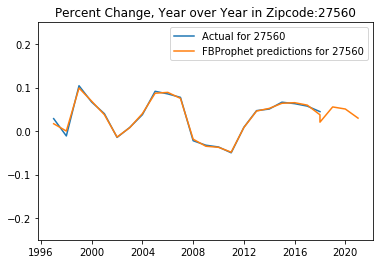

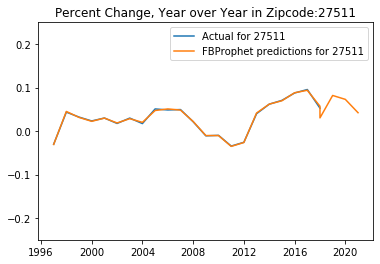

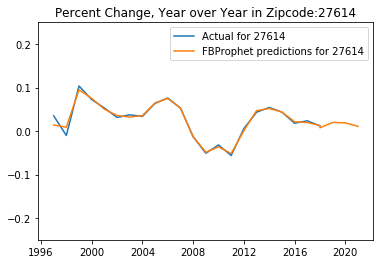

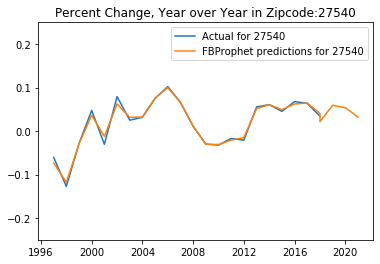

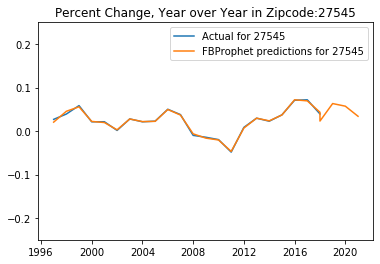

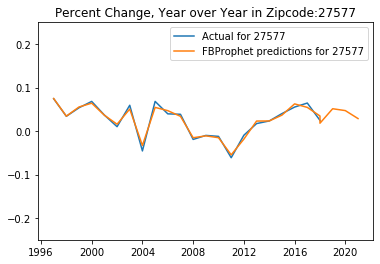

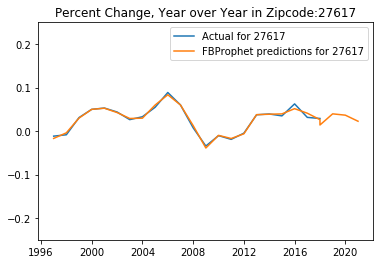

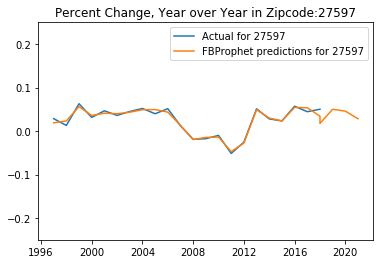

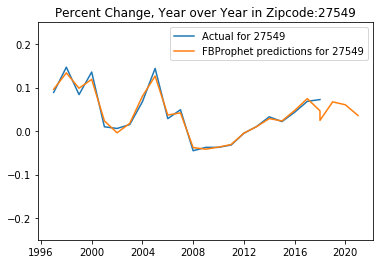

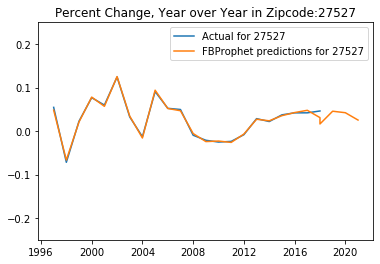

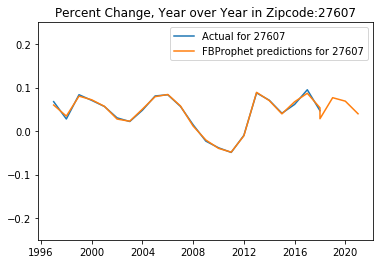

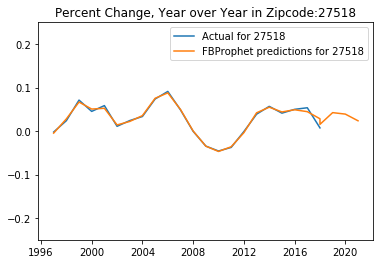

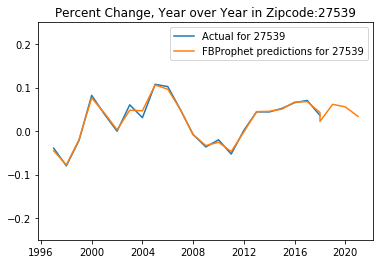

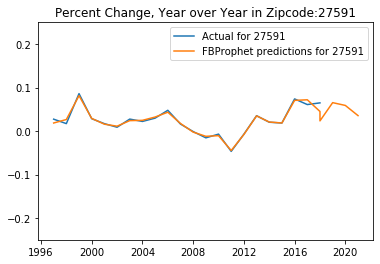

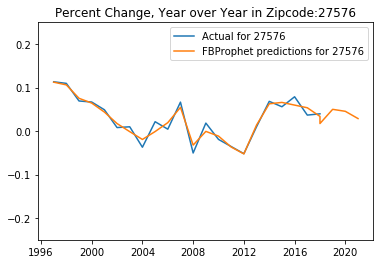

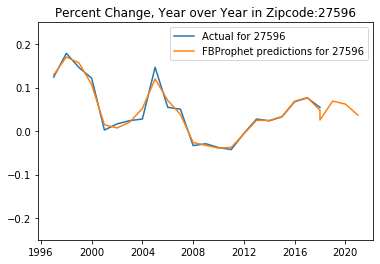

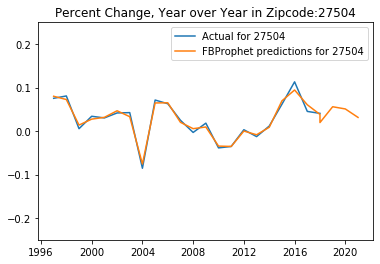

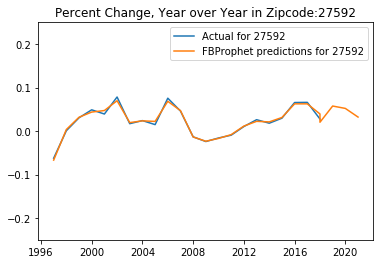

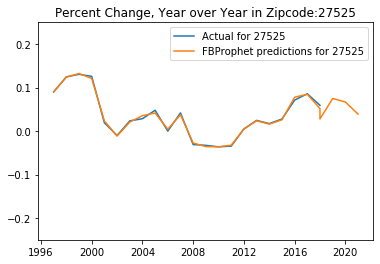

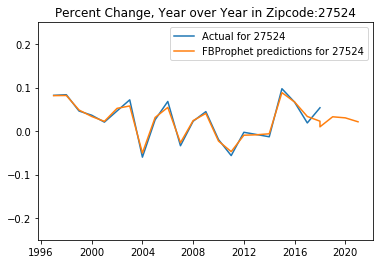

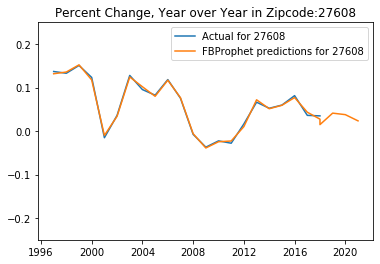

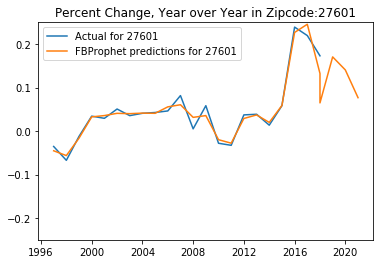

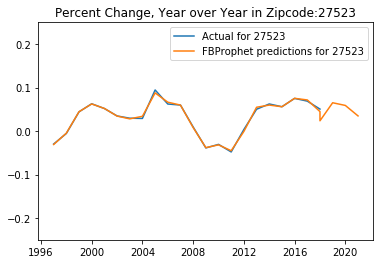

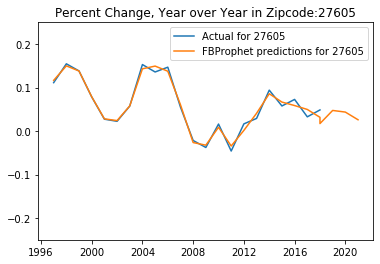

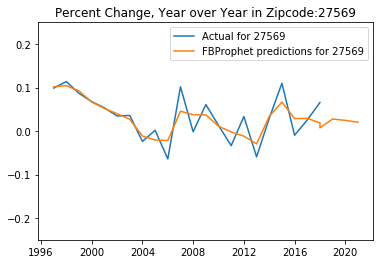

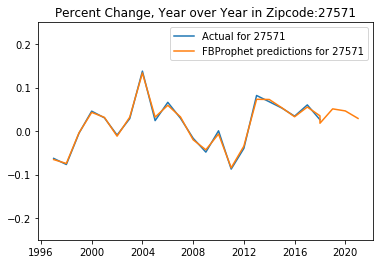

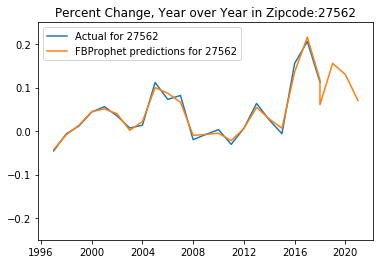

In [15]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct.index, 
         metro_annual_pct[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_pct_change.index, 
             fb_pct_change[zippy], 
             label=f'FBProphet predictions for {zippy}')

    plt.ylim(-0.25,0.25)
    plt.legend(loc='best')
    plt.title(f"Percent Change, Year over Year in Zipcode:{zippy}")
    
    plt.show()

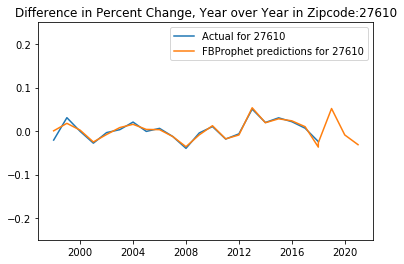

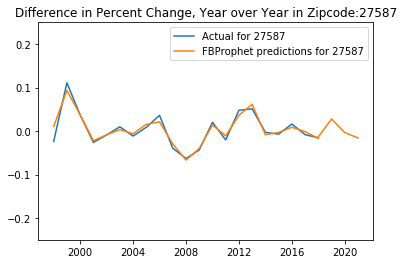

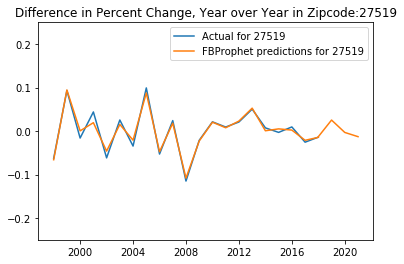

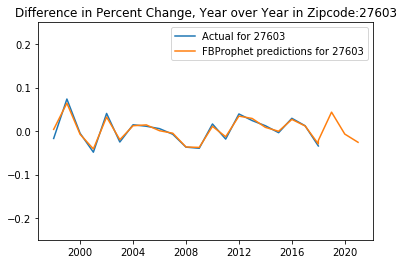

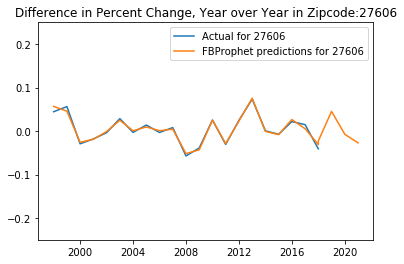

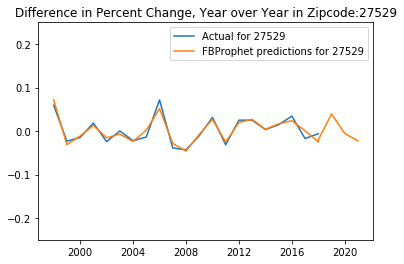

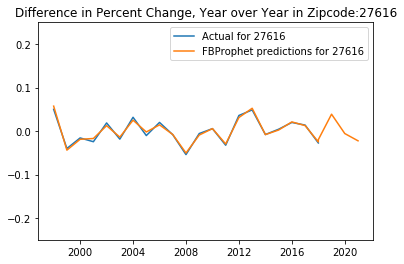

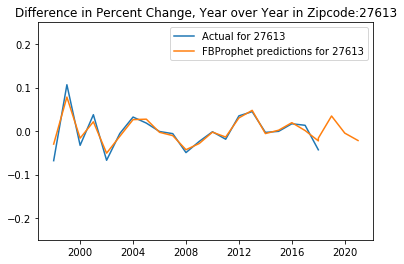

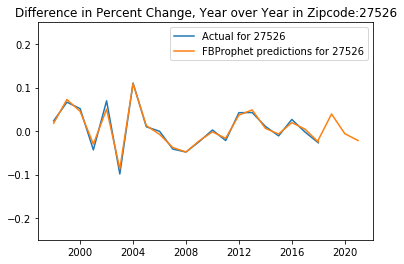

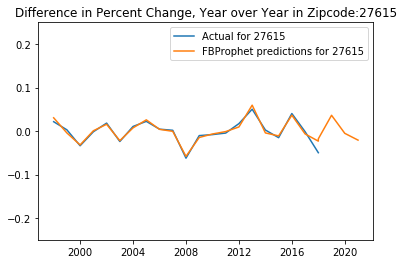

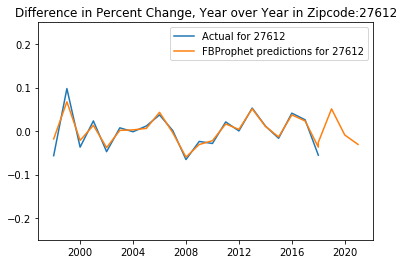

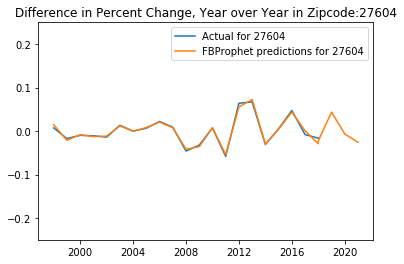

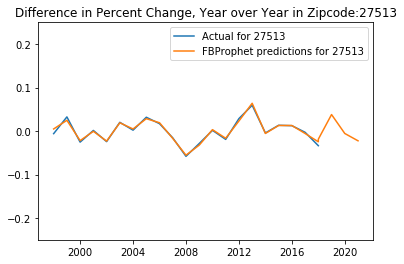

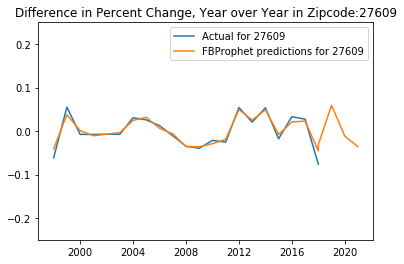

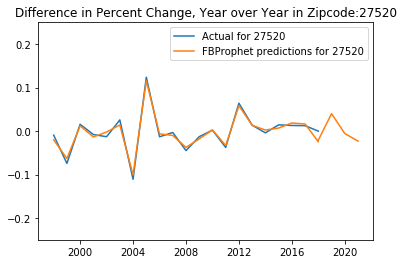

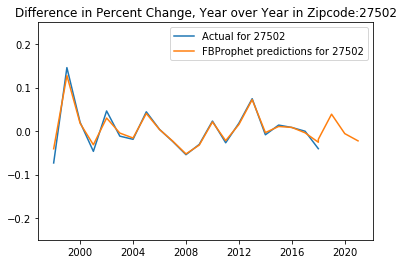

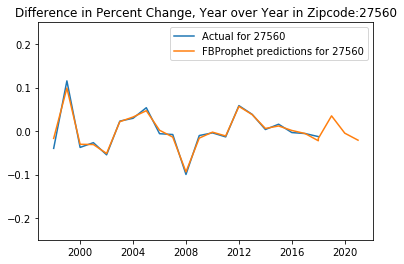

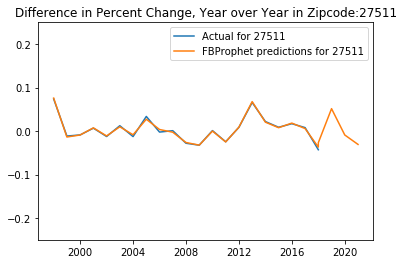

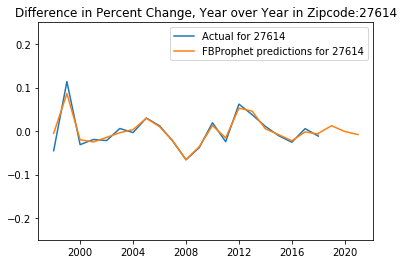

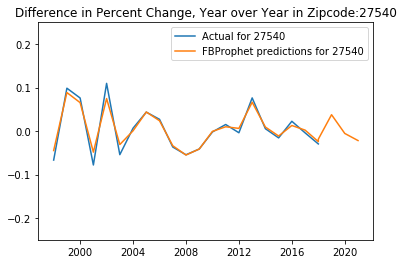

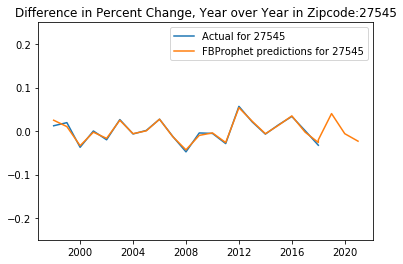

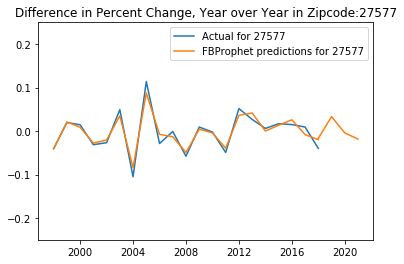

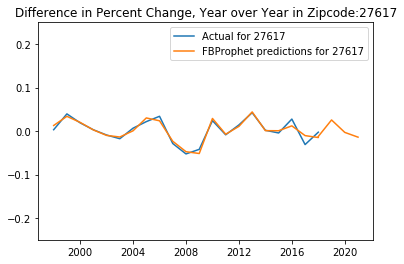

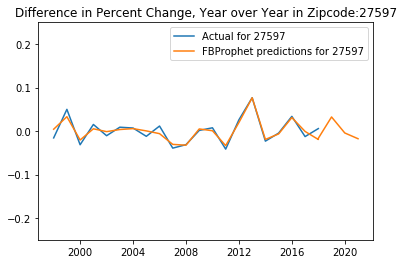

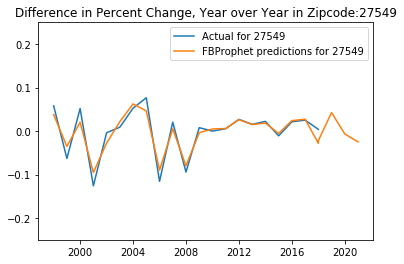

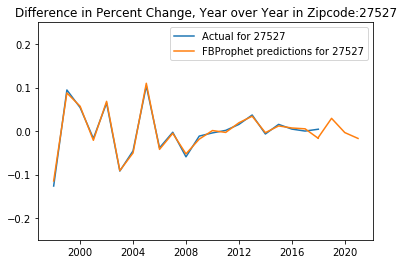

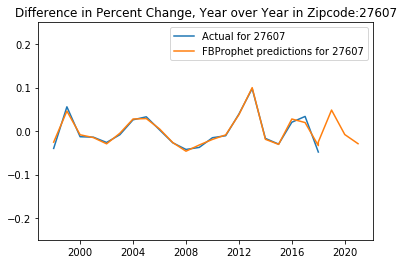

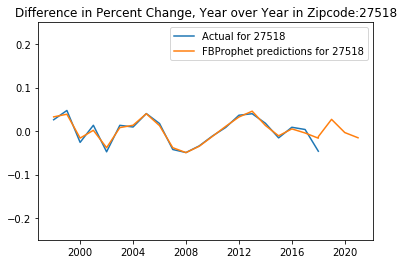

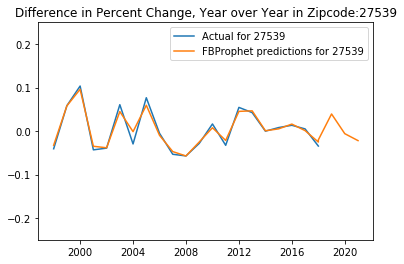

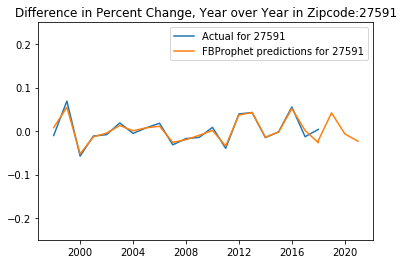

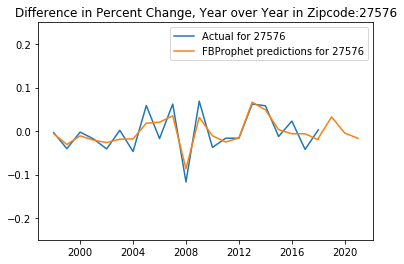

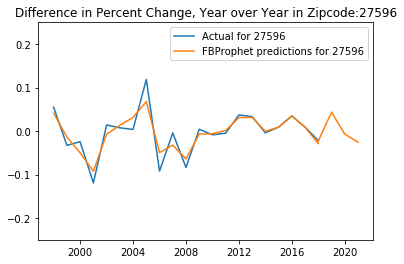

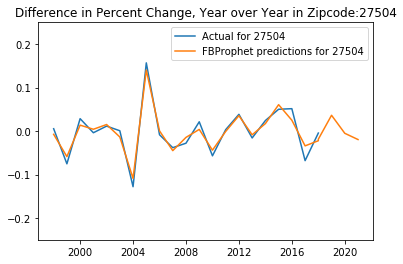

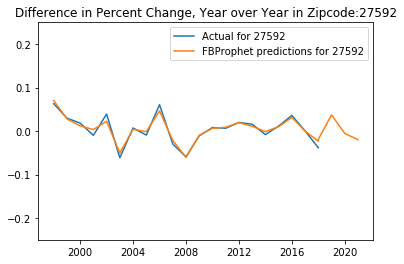

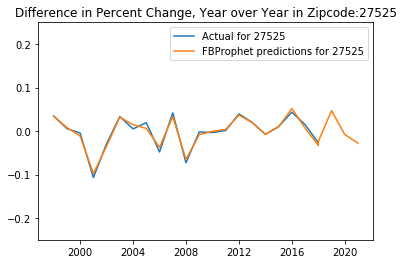

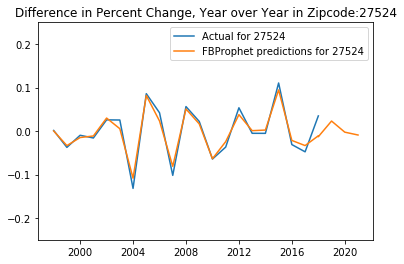

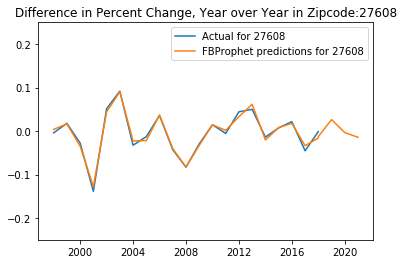

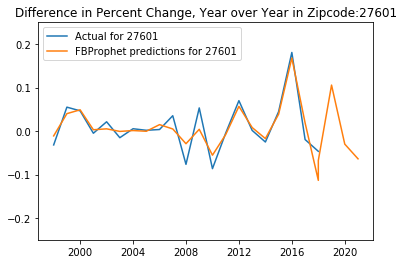

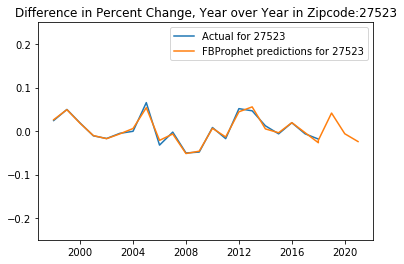

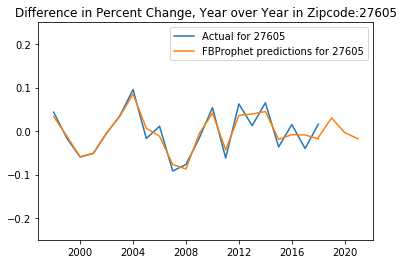

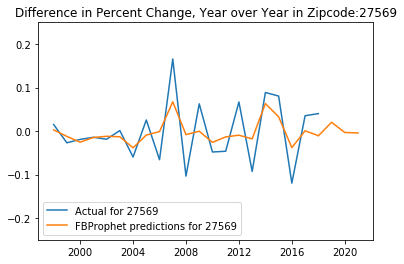

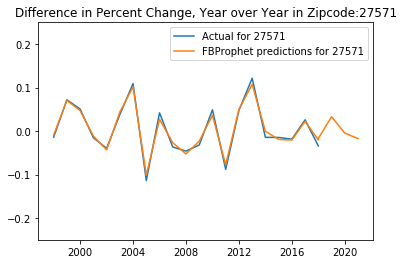

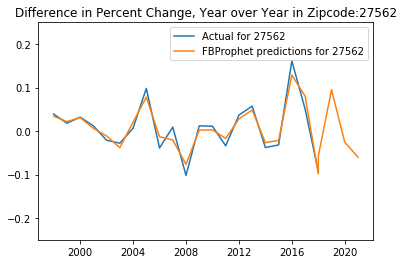

In [16]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct_diff.index, 
         metro_annual_pct_diff[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_ann.index, 
             fb_ann[zippy], 
             label=f'FBProphet predictions for {zippy}')

    plt.ylim(-0.25,0.25)
    plt.legend(loc='best')
    plt.title(f"Difference in Percent Change, Year over Year in Zipcode:{zippy}")
    
    plt.show()